<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده علوم ریاضی
            </font>
			<p></p>
			<font color=blue>
الگوریتم‌های علوم داده
            </font>
			<br />
			<br />
زمستان ۱۴۰۲
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
مینی‌پروژه‌ی ۱ (Clustering)
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>فهرست مطالب</h3>
			<ul style="margin-right: 0;">
                <li>
					<a href="#k-means">
                        k-means
                    </a>
				</li>
                <li>
					<a href="#Spectral Clustering">
                       Spectral Clustering
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<div align="center">
    <div id="k-means">
        <font face="B Nazanin" size="15">
            <font color="#FF7500" size="15">
                k-means
            </font>
            <br>
            <hr>
        </font>
    </div>
</div>


In [14]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="15">
            <hr>
            بارگذاری داده
        </font>
    </div>
</div>


In [16]:
from helper import load_data, normalize_data

data = load_data()
(N, d) = data.shape
print("Number of data points: ", N)
print("Dimension of each data point: ", d)

Number of data points:  272
Dimension of each data point:  2


<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="15">
            <hr>
            مقداردهی اولیه مراکز خوشه‌ها
        </font>
    </div>
</div>


In [20]:
def initialize_clusters(data, k):
    """randomly initialize the k cluster centers (the means). Make sure you choose k clusters from the data itself,
             or ensure otherwise that your initializations have the same scale as the data

    Args:
        data: shape = (N, d). original data.
        k: integer number. predefined number of clusters for the k-means algorithm.
    Returns:
        numpy array with shape (k, d) which corresponds to the k initial clusters.
    """
    ####################################
    N, d = data.shape
    return data[np.random.choice(N, k)]
    ####################################

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="10">
            <hr>
            ساخت ماتریس فواصل
        </font>
    </div>
</div>
<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            یک ماتریس فاصله به نحوی بسازید که فاصله هر داده را از مرکز هر خوشه به دست آورد.

توجه: پس از اتمام `build_distance_matrix` خود، لطفاً تابع را به فایل `helper.py` کپی کنید. در غیر اینصورت، تابع `kmeans` کار نخواهد کرد.
        </font>
    </div>
</div>


In [22]:
def build_distance_matrix(data, mu):
    """builds a distance matrix.

    Args:
        data: numpy array of shape = (N, d). original data.
        mu:   numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        numpy array of shape (N, k):
            squared distances matrix,
            the value row i column j corresponds to the squared distance of datapoint i with cluster center j.
    """
    ####################################
    N, d = data.shape
    k, _ = mu.shape
    distance_matrix = np.zeros((N, k))
    for j in range(k):
        distance_matrix[:, j] = np.sum(np.square(data - mu[j, :]), axis=1)
    return distance_matrix
    ####################################

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="15">
            <hr>
            تابع به‌روزرسانی مراکز k-means
        </font>
    </div>
</div>
<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            طبق مراحل زیر تابع `update_kmeans_parameters` را پیاده‌سازی کنید:
            <ol>
                <li>با توجه به آرگومان‌های ورودی تابع، ماتریس فواصل را به دست آورید.</li>
                <li>با استفاده از ماتریس فواصل، مینمم فاصله نظیر هر داده را در یک لیست به نام`losses` بریزید.</li>
                <li>با استفاده از ماتریس فواصل، اندیس نظیر مرکز با کوتاه‌ترین فاصله با داده مذکور را به ازای همه‌ی داده‌ها به دست آورده و در متغیر `assignment` بریزید.</li>
                <li>مراکز خوشه جدید را به دست آورده و در متغیر `mu` بریزید.</li>
                <li>در انتها، `losses`، `assignments` و `mu` را برگردانید.</li>
            </ol>
        </font>
    </div>
</div>

In [25]:
def update_kmeans_parameters(data, mu_old):
    """compute one step of the kmeans algorithm: using mu_old, find to which cluster each datapoint belongs to,
            then update the parameter cluster centers.

    Args:
        data:   numpy array of shape = (N, d). original data.
        mu_old: numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        losses: shape (N, ), contains the (old) squared distances of each data point to its (old) cluster mean (computed from mu_old).
        assignments: vector of shape (N, ) which contains the cluster associated to each data point.
        mu: updated vector mu of shape (k, d) where each row corresponds to the new cluster center.
    """
    ####################################
    _, d = data.shape
    k, _ = mu_old.shape
    distance_matrix = build_distance_matrix(data, mu_old)
    losses = np.min(distance_matrix, axis=1)
    assignments = np.argmin(distance_matrix, axis=1)

    mu = np.zeros((k, d))
    for j in range(k):
        rows = np.where(assignments == j)[0]
        mu[j, :] = np.mean(data[rows, :], axis=0)
    return losses, assignments, np.nan_to_num(mu)
    ####################################

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="15">
            <hr>
            اجرای الگوریتم k-means
        </font>
    </div>
</div>

The current iteration of k-means is: 0,                    the average loss is 60.5428856507353.


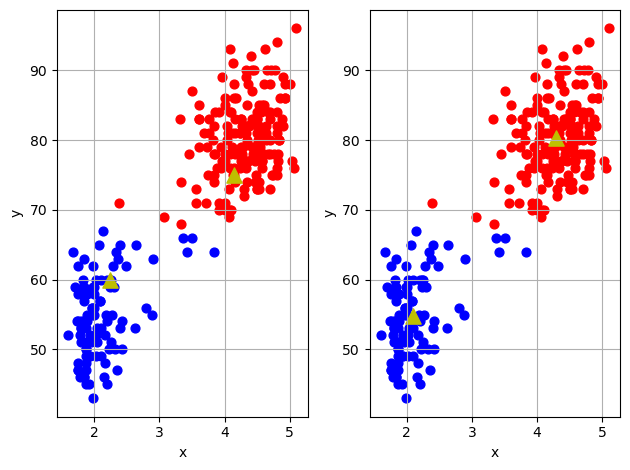

The current iteration of k-means is: 1,                    the average loss is 32.72709088583533.


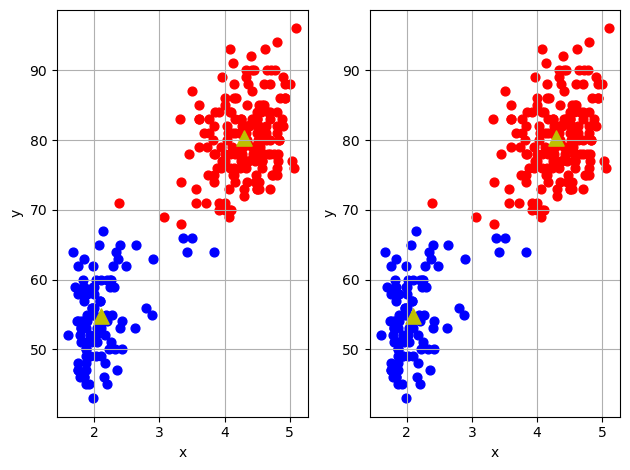

The current iteration of k-means is: 2,                    the average loss is 32.72709088583533.


In [27]:
from helper import build_dir
from plots import plot


def kmeans(data, k, max_iters, threshold, verbose=True):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if verbose:
            print(
                "The current iteration of k-means is: {i}, \
                   the average loss is {l}.".format(
                    i=iteration, l=average_loss
                )
            )
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        if verbose:
            plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu
    return average_loss


# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
average_loss = kmeans(data, k, max_iters, threshold)

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="15">
            <hr>
            رسم تابع هزینه بر حسب تعداد خوشه‌ها
        </font>
    </div>
</div>

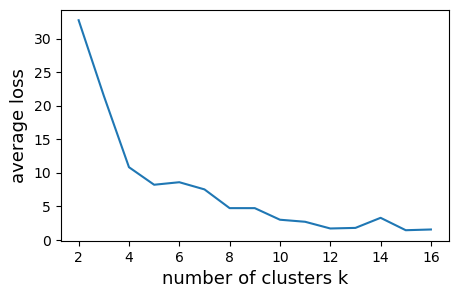

In [28]:
# don't worry about empty slice warnings
import warnings

warnings.filterwarnings("ignore")

losses = []
ks = np.arange(2, 17)
for k in ks:
    average_loss = kmeans(data, k, max_iters, threshold, verbose=False)
    losses += [average_loss]
plt.figure(figsize=(5, 3))
plt.xlabel("number of clusters k", fontsize=13)
plt.ylabel("average loss", fontsize=13)
plt.plot(ks, losses)
plt.show()

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="15">
            <hr>
            استفاده از k-means برای فشرده‌سازی تصویر
        </font>
    </div>
</div>

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="10">
            <hr>
            بارگذاری تصویر
        </font>
    </div>
</div>

In [30]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype
    )
)

Original image: the shape of image=(480, 480, 3), the data type=float32.


<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="10">
            <hr>
            پیش‌پردازش تصویر
        </font>
    </div>
</div>

In [31]:
def preprocess_image(original_image):
    """preprocess the image.
    vectorize the three matrices (each matrix corresponds to a RGB color channel). **don't normalize!**

    Args:
        original_image: numpy array of shape (480, 480, 3)
    Returns:
        processed_image: numpy array of shape (480*480, 3)
    """
    processed_image = original_image.reshape(
        (original_image.shape[0] * original_image.shape[1], 3)
    )
    processed_image = processed_image.astype(float)
    print(
        "Current image: the shape of image={s}, the data type={dt}.".format(
            s=processed_image.shape, dt=processed_image.dtype
        )
    )

    return processed_image


processed_image = preprocess_image(original_image)

Current image: the shape of image=(230400, 3), the data type=float64.


<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="10">
            <hr>
            تابع فشرده‌ساز تصویر با استفاده از k-means
        </font>
    </div>
</div>
<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            طبق مراحل زیر تابع `kmean_compression` را پیاده‌سازی کنید:
            <ol>
                <li>ابتدا مراکز خوشه‌ها را با تابع `initialize_clusters` مقداردهی اولیه کنید.</li>
                <li>یک متغیر لیست جهت نگه‌داری مقادیر `loss` در نظر بگیرید.</li>
                <li>یک حلقه بنویسید که به تعداد `max_iter` هر بار با استفاده از تابع `update_kmeans_parameters` مقادیر `losses`، `assignments`، و `mu` را به‌روزرسانی کند. سپس میانگین `losses` را به لیست اضافه کند.</li>
                <li>مراکز خوشه‌های قدیمی را با مقادیر جدید (`mu`) به‌روز کنید.</li>
            </ol>
            توجه کنید که حلقه تا جایی باید اجرا شود که یا تغییر `loss` از مقدار `threshold` کمتر شود یا به تعداد `max_iter` بار حلقه اجرا شود.
        </font>
    </div>
</div>

The current iteration of kmeans is: 0, the average loss is 0.08541907932980003.
The current iteration of kmeans is: 10, the average loss is 0.02639325126109858.
The current iteration of kmeans is: 20, the average loss is 0.025114230957950522.
The current iteration of kmeans is: 30, the average loss is 0.025097725160022753.


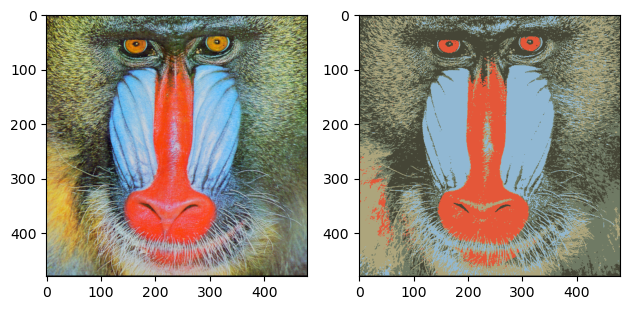

In [33]:
from plots import plot_image_compression


def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression.
    Args:
        original_image: numpy array of shape (480, 480, 3).
        processed_image: numpy array of shape (480*480, 3).
        k: scalar. Number of clusters.
        max_iters: integer. Max number of iterations for the kmeans algorithm.
        threshold: scalar. Stop the kmeans algorithm if the loss decrease between two iterations
                        is lower than the threshold.
    """

    ####################################
    mu_old = initialize_clusters(processed_image, k)

    loss_list = []

    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)

        average_loss = np.mean(losses)
        loss_list.append(average_loss)

        if iter % 10 == 0:
            print(
                "The current iteration of kmeans is: {i}, the average loss is {l}.".format(
                    i=iter, l=average_loss
                )
            )

        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        mu_old = mu
    ####################################
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)


# define parameters
k = 5
max_iter = 100
threshold = 1e-7

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)

<div align="center">
    <div id="Spectral Clustering">
        <font face="B Nazanin" size="15">
            <font color="#FF7500" size="15">
                Spectral Clustering
            </font>
            <br>
            <hr>
        </font>
    </div>
</div>

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            در این بخش با خوشه‌بندی طیفی آشنا می‌شویم و با چند مثال عملی آن را درک می‌کنیم.
            </hr>
        </font>
    </div>
</div>


In [35]:
# import these packages
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="10">
            <hr>
            مسائل با پیچیدگی بیشتر
        </font>
    </div>
</div>
<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            در مثال‌های زیر مشاهده می‌کنیم که الگوریتم k-means در خوشه‌بندی نوعی از داده‌ها به خوبی عمل نمی‌کند.
            </hr>
        </font>
    </div>
</div>

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            ابتدا با استفاده از تابع `datasets.make_moons` داده‌های نیم دایره‌ای با مقدار نویز 5 درصد و تعداد 200 تا تولید می‌کنیم.
            </hr>
        </font>
    </div>
</div>

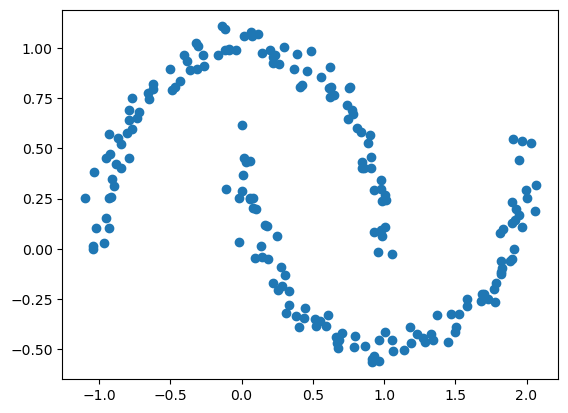

In [37]:
np.random.seed(42)
n = 200
####################################
X_moons,y_moons = datasets.make_moons(n_samples=n, noise=0.05)
####################################

plt.scatter(X_moons[:,0], X_moons[:,1])

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            حال یک object از کلاس KMeans که با تعداد خوشه 2 ایجاد می‌کنیم و روی داده‌ها آن را فیت می‌کنیم و با استفاده از تابع predict لیبل‌ها را به دست می‌آوریم.
            </hr>
        </font>
    </div>
</div>

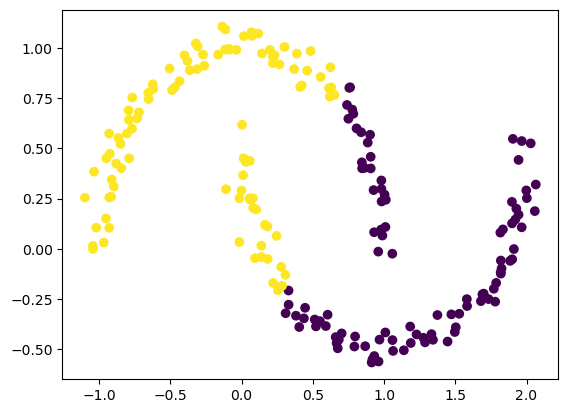

In [42]:
####################################
km = KMeans(n_clusters=2)
km.fit(X_moons)
km_moons_lables = km.predict(X_moons)
####################################

plt.scatter(X_moons[:,0], X_moons[:,1], c = km_moons_lables)

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            همانطور که مشاهده می‌کنید الگوریتم خوشه‌بندی kmeans قادر نیست که داده‌ها رو به درستی خوشه‌بندی کند.
            </hr>
        </font>
    </div>
</div>

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            به طریق مشابه با استفاده از تابع `datasets.make_moons` داده‌های دایره‌ای با مقدار نویز 5 درصد و تعداد 1000 تا تولید می‌کنیم. پارامتر factor در تابع make_moons را برابر 0.4 قرار دهید.
            </hr>
        </font>
    </div>
</div>

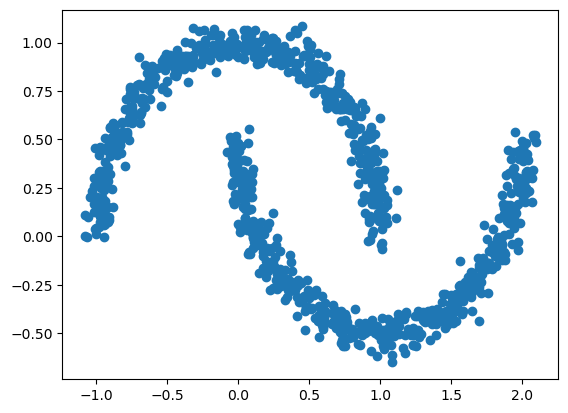

In [47]:
n = 1000

####################################
X_circles, y_circles = datasets.make_moons(n_samples=n, noise=0.05)
####################################

plt.scatter(X_circles[:,0], X_circles[:,1])

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            به طریق مشابه یک object از کلاس KMeans که با تعداد خوشه 2 ایجاد می‌کنیم و روی داده‌ها آن را فیت می‌کنیم و با استفاده از تابع predict لیبل‌ها را به دست می‌آوریم.
            </hr>
        </font>
    </div>
</div>

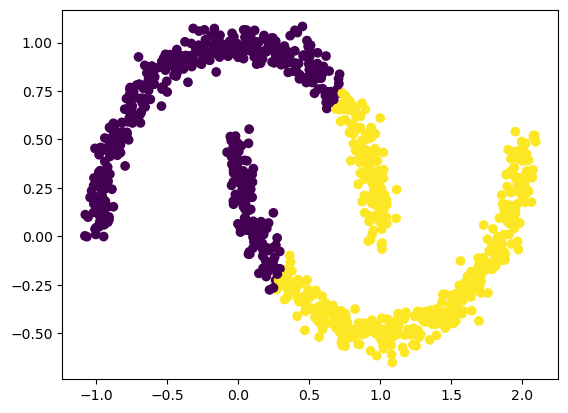

In [49]:
####################################
km = KMeans(n_clusters=2)
km.fit(X_circles)
km_circles_labels = km.predict(X_circles)
####################################

plt.scatter(X_circles[:,0], X_circles[:,1], c = km_circles_labels)

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="10">
            <hr>
            ساخت ماتریس شباهت
        </font>
    </div>
</div>
<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            با استفاده از تابع `sklearn.metrics.pairwise_distance` و با دادن آرگومان‌های مناسب ورودی فاصله اقلیدسی بین دو به دوی نقاط X را به دست آورده و سپس ماتریس شباهت را به شکل مقابل تعریف کنید: درایه‌های روی قطر اصلی صفر، درایه‌هایی که فاصله‌ی اقلیدسی بین دو نقطه نظیرشان از مقدار epsilon کمتر بود مقدار 1، و درایه‌هایی که فاصله‌ی اقلدیسی نقاط نظیرشان بزرگتر یا مساوی epsilon بود مقدار 0 قرار دهید. در نهایت ماتریس شباهت را return کنید.
            </hr>
        </font>
    </div>
</div>


In [103]:
def similarity_matrix(X, epsilon):
    
####################################
        n = len(X)
        A = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                A[i, j] = np.exp(-np.linalg.norm(X[i] - X[j])**2 / (2 * epsilon**2))
        return A
####################################


<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="10">
            <hr>
            پیاده‌سازی الگوریتم خوشه‌بندی طیفی
        </font>
    </div>
</div>
<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            طبق مراحل زیر تابع `spectral_clustering` را پیاده‌سازی کنید:
            <ol>
                <li>ابتدا به کمک تابع `similarity_matrix` که پیاده‌سازی کردید ماتریس شباهت را به دست آورده و در متغیر A بریزید.</li>
                <li>ماتریس قطری D را بسازید به طوری که درایه‌ی روی سطر و ستون i برابر مجموع درایه‌های سطر i در ماتریس A باشد.</li>
                <li>ماتریس لاپلاسین را به صورت زیر تعریف کنید: L = D ^ (-1) (D - A). برای محاسبه وارون از تابع np.linalg.pinv استفاده کنید.</li>
            </ol>
        </font>
    </div>
</div>

In [104]:
def spectral_clustering(X, epsilon):

    """
    -------
    PURPOSE
    To perform spectral clustering on the input data with the given epsilon parameter.

    ----------
    PARAMETERS
    1. X: the data, (n x 2) array 
    2. epsilon: the distance criteria for two points to be considered in the same cluster.

    ------
    RETURN
    Array containing cluster labels obtained through Spectral Clustering.

    """
    
    A = similarity_matrix(X, epsilon)
    
    D = np.diag(np.sum(A, axis=1))
    
    L = np.linalg.pinv(D) @ (D - A)
    
    # computing the eigenvector for the second-smallest eigenvalue
    eigval_sorted = np.linalg.eig(L)[0].argsort() # indices of sorted eigenvalues
    eigvecs = np.linalg.eig(L)[1] # matrix of eigenvectors
    z_eigvec = eigvecs[:,eigval_sorted][:,1] # eigenvec w.r.t. second smallest eigenvalue
    
    z_eigvec[z_eigvec >= 0] = 1
    z_eigvec[z_eigvec < 0] = 0
    
    return z_eigvec

<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            حال تابع خوشه‌بندی طیفی را روی داده‌های نیم‌دایره‌ای (X_moon) و با اپسیلون 0.7 اجرا کنید و لیبل‌ها را در متغیر sc_moon_labels بریزید.
            </hr>
        </font>
    </div>
</div>

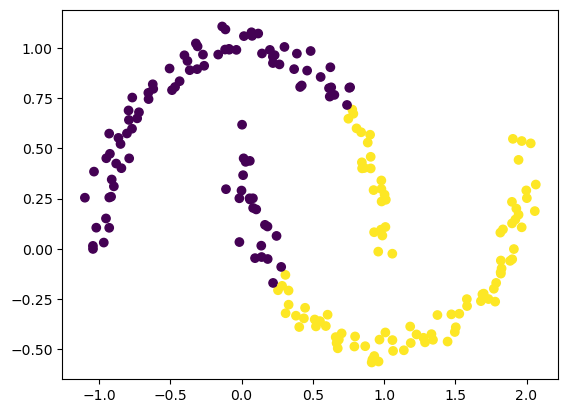

In [105]:
n = 200
####################################
sc_moon_labels = spectral_clustering(X= X_moons, epsilon=0.7)
####################################

plt.scatter(X_moons[:,0], X_moons[:,1], c = sc_moon_labels)


<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            به طور مشابه تابع خوشه‌بندی طیفی را روی داده‌های نیم‌دایره‌ای (X_circles) و با اپسیلون 0.7 اجرا کنید و لیبل‌ها را در متغیر sc_moon_circles بریزید.
            </hr>
        </font>
    </div>
</div>

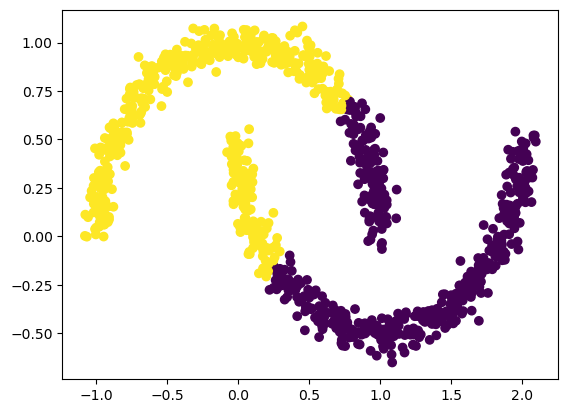

In [106]:
n = 1000
####################################
sc_circles_labels = spectral_clustering(X= X_circles, epsilon=0.7)
####################################

plt.scatter(X_circles[:,0], X_circles[:,1], c = sc_circles_labels)

<div align="center">
    <div id="Spectral Clustering">
        <font face="B Nazanin" size="15">
            <font color="#FF7500" size="15">
                نکات تحویل مینی‌پروژه
            </font>
            <br>
            <hr>
        </font>
    </div>
</div>
<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            <ol>
                <li>فرمت نام گذاري تكليف ارسالي بايد به صورت زير باشد:  PRJX_LastName_StudentIDكه Xشماره تكليف LastName
نام خانوادگي شما و  StudentIDشماره دانشجويي شما است. شما در نهایت باید یک فایل فشرده تحویل بدهید.</li>
                <li>انجام اين تكليف به صورت تك نفره است. در صورت مشاهده تقلب، نمرات هم مبدا كپي و هم مقصد آن صفر لحاظ مي شود</li>
                <li>تنها در محل‌های مشخص شده با عبارت ### ___ Enter your code here ___ ### کد خود را بنویسید و سایر قسمت‌ها را دست نخورده باقی بگذارید.</li>
                <li>جهت نوشتن کد پاسخ، به کامنت‌ها و توضیحات هر بخش توجه کامل داشته باشید.</li>
                <li>در صورت وجود هر گونه ابهام و يا سوال مي توانيد سوالات خود را با آی‌دی تلگرام @alireza_abrehforoush در میان بگذارید.</li>
            </ol>
        </font>
    </div>
</div>